In [9]:
import pandas as pd

df = pd.read_csv('Data/Processed_Data/Newsfeed_Processed_09_09_2024_18.csv')

sentiment = df[['Pull_date', 'Sentiment_Vader', 'Sentiment_TextBlob', 'Average_Sentiment']]
sentiment = sentiment.groupby(['Pull_date']).mean().reset_index()
sentiment.to_csv('Data/Processed_Data/Sentiment_Values/Sentiment.csv')


NameError: name 'current_date' is not defined

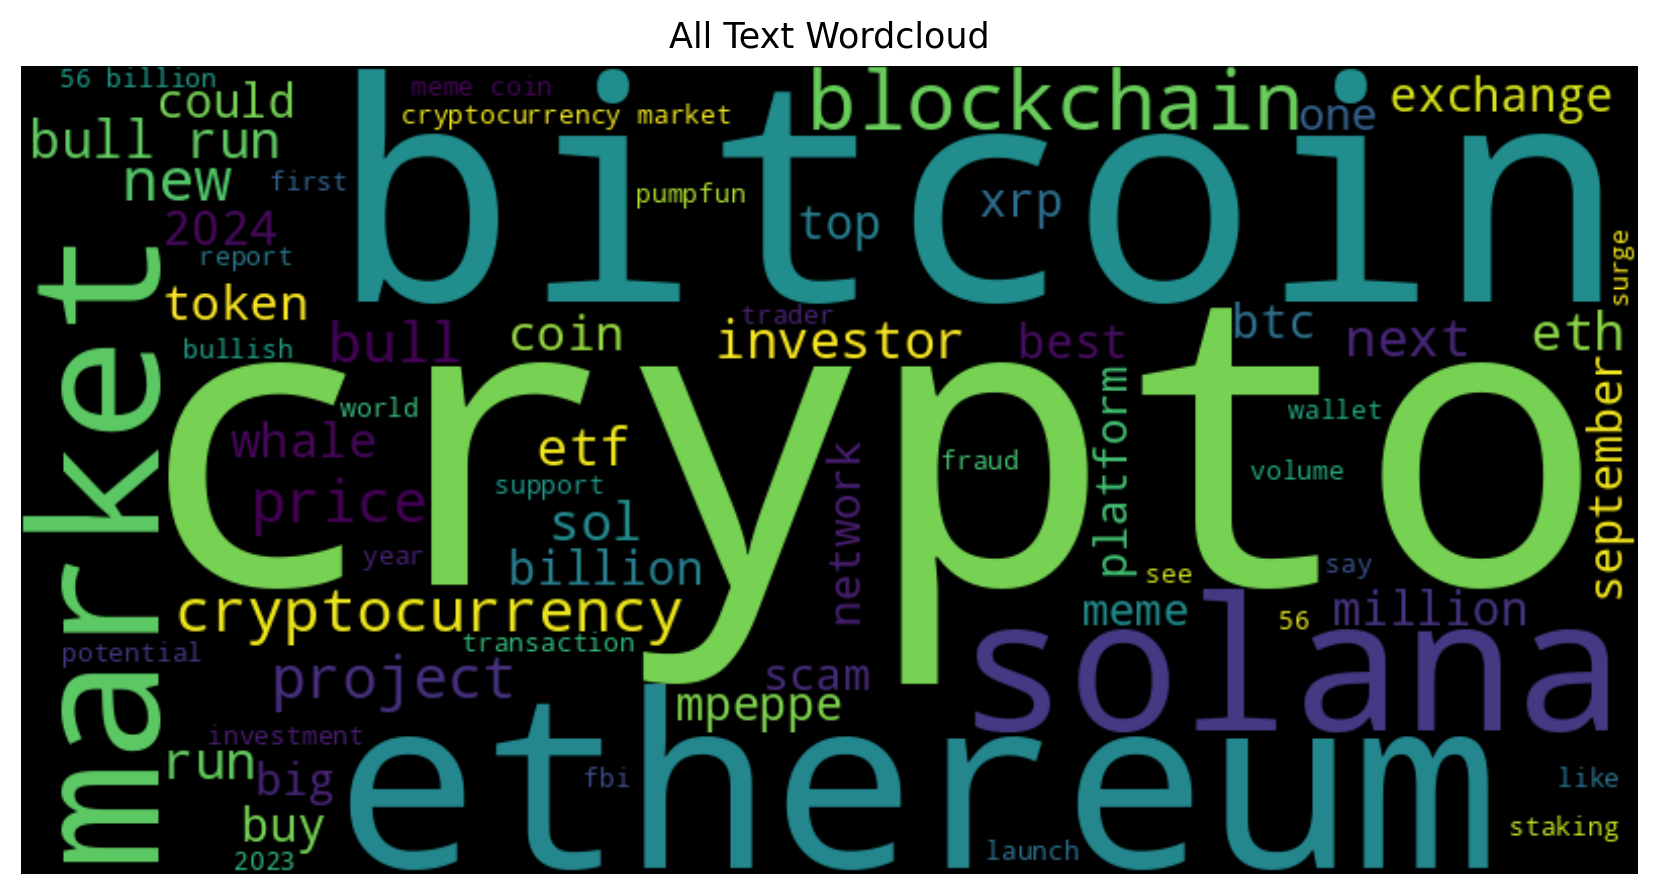

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


total_raw_data = pd.read_csv('Data/Processed_Data/Newsfeed_Processed_09_10_2024_21.csv')
total_raw_data['Pre-Processed Text'] = total_raw_data['Pre-Processed Text'].fillna('')
#total_raw_data['Pre-Processed Text'] = total_raw_data['Pre-Processed Text'] .fillna('')
# STEP 1: DEFINE FUNCTIONS
def tf_idf(text, ngram_range=(1, 2), exclude_words = None):
    if exclude_words is None:
        exclude_words = []
    vectorizer = TfidfVectorizer(stop_words=exclude_words, ngram_range=ngram_range)
    tfidf_matrix = vectorizer.fit_transform(text)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    term_importance = tfidf_df.sum().sort_values(ascending=False)
    return term_importance

def word_cloud(text, title, type, top=65, dpi=210):
    top_n_terms = text.head(top)
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(top_n_terms)
    fig = plt.figure(figsize=(10, 5), dpi = dpi)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    fig.savefig(f'Data/Processed_Data/Graphic_Output/{type}WC{current_date}.png')
    


# STEP 2: MAKE FOR FULL DATAFRAME
FullText = total_raw_data['Pre-Processed Text']
FullText = tf_idf(FullText)
word_cloud(FullText, 'All Text Wordcloud', 'AllText')

PositiveSentiment = total_raw_data[total_raw_data["Average_Sentiment"] > 0.75]['Pre-Processed Text']
PositiveSentiment = tf_idf(PositiveSentiment)
word_cloud(PositiveSentiment, 'Positive News Articles Only', 'Positive')

NegativeSentiment = total_raw_data[total_raw_data["Average_Sentiment"] < -0.75]['Pre-Processed Text']
NegativeSentiment = tf_idf(NegativeSentiment)
word_cloud(NegativeSentiment, 'Negative News Articles Only', 'Negative')
